# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from typing import Union, Callable
from scipy.integrate import solve_ivp

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

Zadanie 1

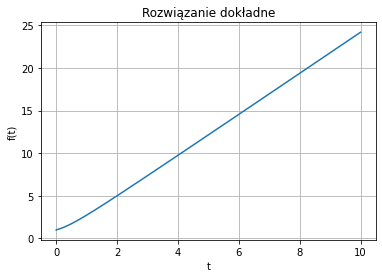

In [2]:
# Rozwiązanie dokładne
f = lambda t: t + np.sqrt(1 + 2 * t ** 2)
t = np.linspace(0, 10, 1000)
plt.plot(t, f(t))
plt.title("Rozwiązanie dokładne")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

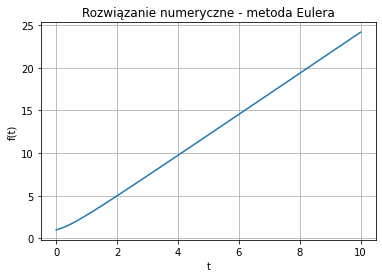

In [3]:
# Rozwiązanie numeryczne - metoda Eulera
def solve_euler(fun: Callable, t_span: np.array, y0: np.array):
    ''' 
    Funkcja umożliwiająca rozwiązanie układu równań różniczkowych z wykorzystaniem metody Eulera w przód.
    
    Parameters:
    fun: Prawa strona równania. Podana funkcja musi mieć postać fun(t, y). 
    Tutaj t jest skalarem i istnieją dwie opcje dla ndarray y: Może mieć kształt (n,); wtedy fun musi zwrócić array_like z kształtem (n,). 
    Alternatywnie może mieć kształt (n, k); wtedy fun musi zwrócić tablicę typu array_like z kształtem (n, k), tj. każda kolumna odpowiada jednej kolumnie w y. 
    t_span: wektor czasu dla którego ma zostać rozwiązane równanie
    y0: warunke początkowy równanai o wymiarze (n,)
    Results:
    (np.array): macierz o wymiarze (n,m) zawierająca w wkolumnach kolejne rozwiązania fun w czasie t_span.  

    '''
 
    h = (t_span[-1] - t_span[0])/t_span.size
    y = np.empty((y0.size, t_span.size))
    y[:, 0] = y0[:]
    for i in range(0, t_span.size - 1):
        y[:, i + 1] = y[:, i] + h * fun(i * h, y[:, i])
    return y.T


f = lambda t, x: (x + t) / (x - t)
t_span = np.linspace(0, 10, 1000)
y0 = np.array([1])
solution = solve_euler(f, t_span, y0)
plt.plot(t_span, solution)
plt.title("Rozwiązanie numeryczne - metoda Eulera")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

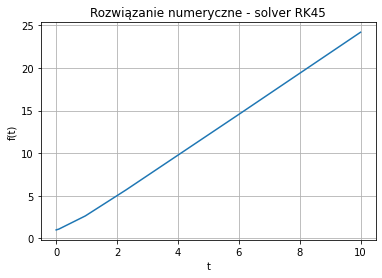

In [4]:
# Rozwiązanie numeryczne - solver RK45
f = lambda t, x: (x + t) / (x - t)

solution = solve_ivp(f, (0, 10), [1], method="RK45")

plt.plot(solution.t, solution.y.T)
plt.title("Rozwiązanie numeryczne - solver RK45")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

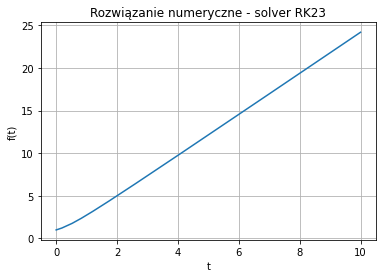

In [5]:
# Rozwiązanie numeryczne - solver RK23
f = lambda t, x: (x + t) / (x - t)

solution = solve_ivp(f, (0, 10), [1], method="RK23")

plt.plot(solution.t, solution.y.T)
plt.title("Rozwiązanie numeryczne - solver RK23")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Zadanie 2

In [6]:
def equations(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0]**2 + x[1]**2)**(3/2))
    x4 = -x[1] / ((x[0]**2 + x[1]**2)**(3/2))
    
    return np.array([x1, x2, x3, x4])

t = np.linspace(0, 10, 100000)
solution = solve_euler(equations, t, np.array([1, 0, 0, 1]).T)
RK45 = solve_ivp(equations, (0, 10), np.array([1, 0, 0, 1]), method="RK45", max_step=0.01)
RK23 = solve_ivp(equations, (0, 10), np.array([1, 0, 0, 1]), method="RK23")

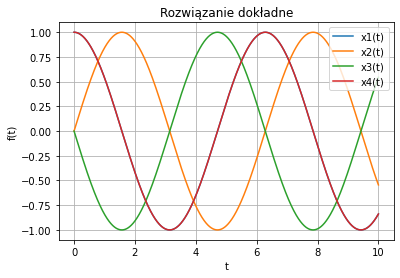

In [7]:
# Rozwiązanie dokładne
plt.plot(t, np.cos(t), t, np.sin(t), t, -np.sin(t), t, np.cos(t))
plt.title("Rozwiązanie dokładne")
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

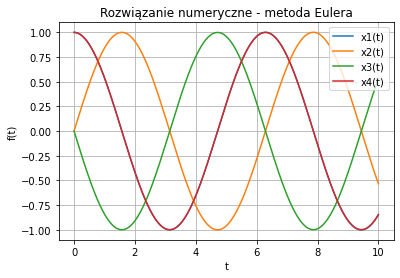

In [8]:
# Rozwiązanie numeryczne - metoda Eulera
plt.plot(t, solution)
plt.title("Rozwiązanie numeryczne - metoda Eulera")
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

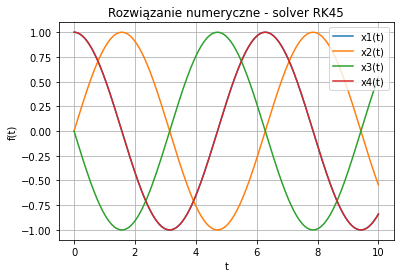

In [9]:
# Rozwiązanie numeryczne - solver RK45
plt.plot(RK45.t, RK45.y[0], RK45.t, RK45.y[1], RK45.t, RK45.y[2], RK45.t, RK45.y[3])
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.title("Rozwiązanie numeryczne - solver RK45")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

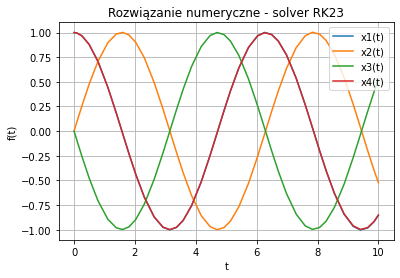

In [10]:
# Rozwiązanie numeryczne - solver RK45
plt.plot(RK23.t, RK23.y[0], RK23.t, RK23.y[1], RK23.t, RK23.y[2], RK23.t, RK23.y[3])
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.title("Rozwiązanie numeryczne - solver RK23")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Zadanie 3

In [11]:
def equations(t, x):
    A = np.array([[-667, 333], [666, -334]])
    return A @ x

t = np.linspace(0, 10, 10000)
solution = solve_euler(equations, t, np.array([0, 3]).T)
RK45 = solve_ivp(equations, (0, 10), np.array([0, 3]).T, method="RK45")
RK23 = solve_ivp(equations, (0, 10), np.array([0, 3]).T, method="RK23")

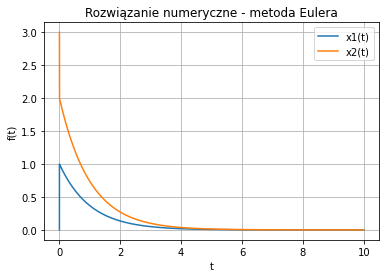

In [12]:
# Rozwiązanie numeryczne - metoda Eulera
plt.plot(t, solution)
plt.title("Rozwiązanie numeryczne - metoda Eulera")
plt.legend(["x1(t)", "x2(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

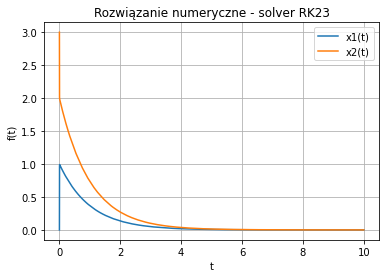

In [13]:
# Rozwiązanie numeryczne - solver RK45
plt.plot(RK45.t, RK45.y[0], RK45.t, RK45.y[1])
plt.legend(["x1(t)", "x2(t)"])
plt.title("Rozwiązanie numeryczne - solver RK23")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

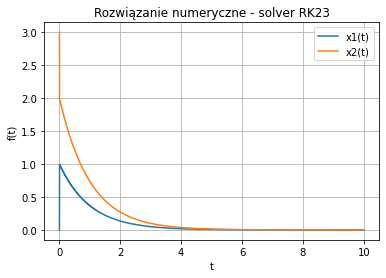

In [14]:
# Rozwiązanie numeryczne - solver RK45
plt.plot(RK23.t, RK23.y[0], RK23.t, RK23.y[1])
plt.legend(["x1(t)", "x2(t)"])
plt.title("Rozwiązanie numeryczne - solver RK23")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Zadanie 4

In [25]:
def arenstorf(t, x):
    mi = 0.012277471
    mi_prim = 1 - mi

    D1 = ((x[0] + mi)**2 + x[2]**2)**(3/2)
    D2 = ((x[0] - mi_prim)**2 + x[2]**2)**(3/2)
    
    x1 = x[1]
    x2 = x[0] + 2 * x[3] - mi_prim * (x[0] + mi) / D1 - mi * (x[0] - mi_prim) / D2
    x3 = x[3]
    x4 = x[2] - 2 * x[1] - mi_prim * x[2] / D1 -  mi * x[2] / D2
    
    return np.array([x1, x2, x3, x4])


T = 17.0652165601579625588917206249
solutions = solve_euler(arenstorf, np.linspace(0, T, 10000), np.array([0.994, 0, 0, -2.00158510637908252240537862224]).T)
RK45 = solve_ivp(arenstorf, (0, T), np.array([0.994, 0, 0, -2.00158510637908252240537862224]).T, method="RK45")
RK23 = solve_ivp(arenstorf, (0, T), np.array([0.994, 0, 0, -2.00158510637908252240537862224]).T, method="RK23")

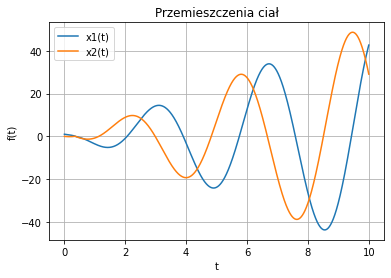

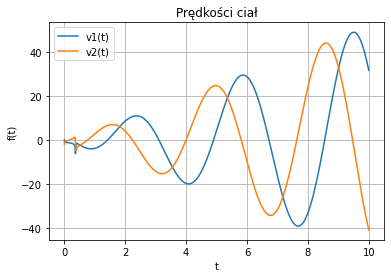

In [26]:
# Rozwiązanie numeryczne - Metoda Eulera
plt.plot(t, solutions[:, 0], t, solutions[:, 2])
plt.title("Przemieszczenia ciał")
plt.legend(["x1(t)", "x2(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

plt.plot(t, solutions[:, 1], t, solutions[:, 3])
plt.title("Prędkości ciał")
plt.legend(["v1(t)", "v2(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

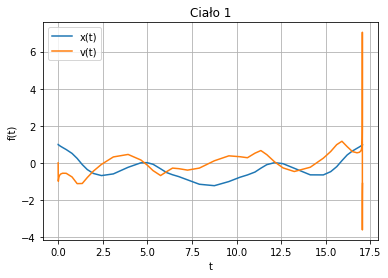

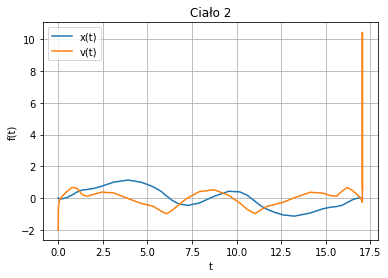

In [29]:
# Rozwiązanie numeryczne - solver RK45
plt.plot(RK45.t, RK45.y[0], RK45.t, RK45.y[1])
plt.title("Ciało 1")
plt.legend(["x(t)", "v(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

plt.plot(RK45.t, RK45.y[2], RK45.t, RK45.y[3])
plt.title("Ciało 2")
plt.legend(["x(t)", "v(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

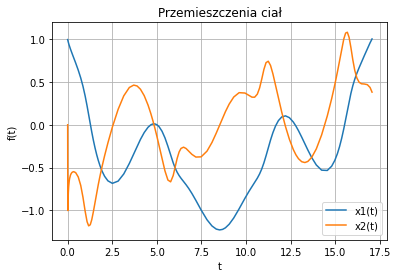

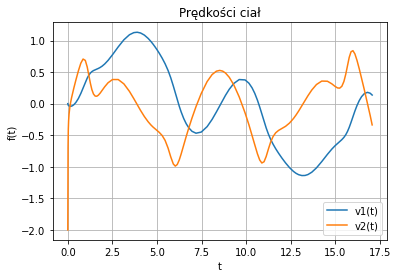

In [28]:
# Rozwiązanie numeryczne - solver RK23
plt.plot(RK23.t, RK23.y[0], RK23.t, RK23.y[1])
plt.title("Ciało 1")
plt.legend(["x(t)", "v(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

plt.plot(RK23.t, RK23.y[2], RK23.t, RK23.y[3])
plt.title("Ciało 2")
plt.legend(["x(t)", "v(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Wnioski:

Laboratorium 13 było kontynuacją laboratorium 12. Należało wykonać dokładnie te same zadania, jednak tym razem oprócz metody Eulera zastosowano również dwa wbudowane solvery: RK45 oraz RK23. Oba solvery są znacznie bardziej wydajne od prostej metody Eulera, pozatym dają bardzo dokładne wyniki.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
